In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)

In [5]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [25]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [26]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [29]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [30]:
html_data = requests.get(url).text

In [31]:
soup = BeautifulSoup(html_data, "html.parser")

In [38]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [39]:
temp_list = []

for table in soup.find_all("table", class_="historical_data_table table"):
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                Date = cols[0].text
                Revenue = cols[1].text.replace("$", "").replace(",", "")
                temp_list.append({"Date": Date, "Revenue": Revenue})

In [41]:
tesla_revenue = pd.DataFrame(temp_list)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [42]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [43]:
gme = yf.Ticker("GME")

In [44]:
gme_data = gme.history(period="max")

In [45]:
gme_data.reset_index(inplace=True)

In [48]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [100]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [101]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [102]:
html_data_2 = requests.get(url).text

In [103]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [104]:
tbody = soup.find_all('tbody')[1]

In [105]:
gme_revenue = []
for row in tbody.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2:  
        date = cols[0].get_text(strip=True)
        revenue = cols[1].get_text(strip=True)\
                          .replace('$', '')\
                          .replace(',', '')
        gme_revenue.append({'Date': date, 'Revenue': revenue})

In [108]:
gme_revenue = pd.DataFrame(gme_revenue)

In [109]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


/tmp/ipykernel_817/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_817/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



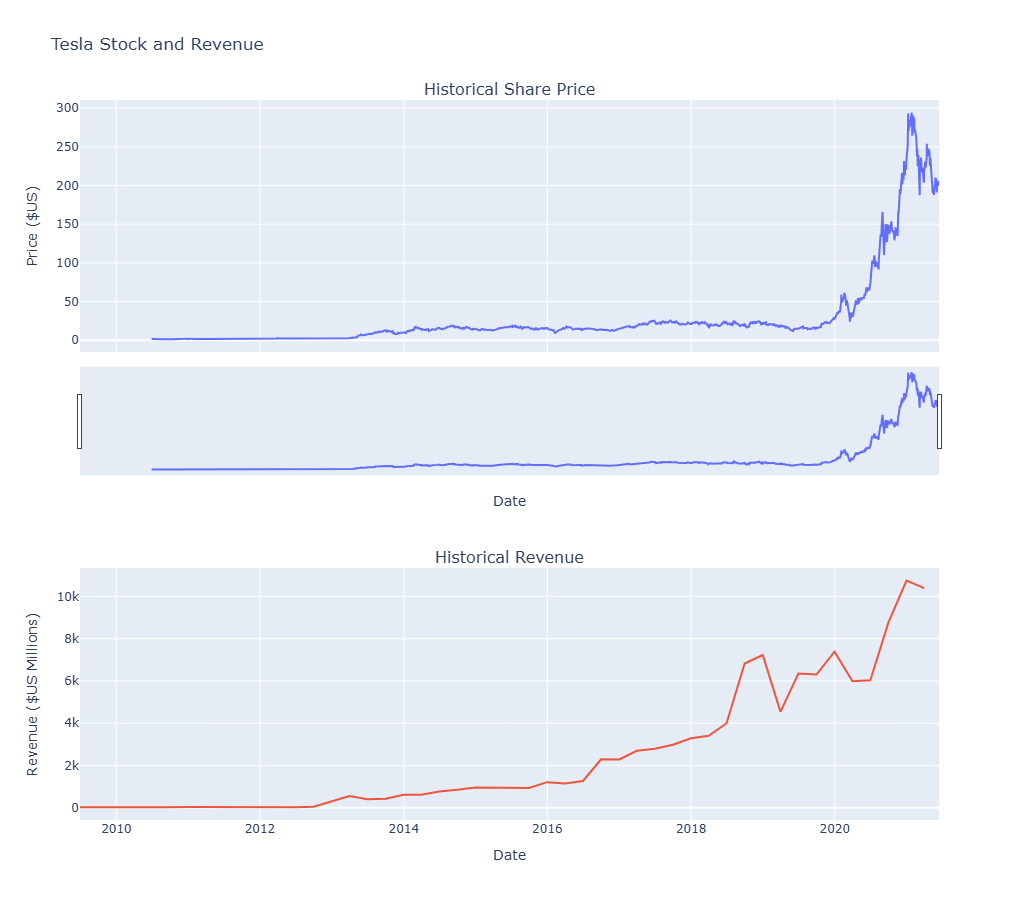

In [111]:
make_graph(tesla_data, tesla_revenue, "Tesla Stock and Revenue")

/tmp/ipykernel_817/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_817/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



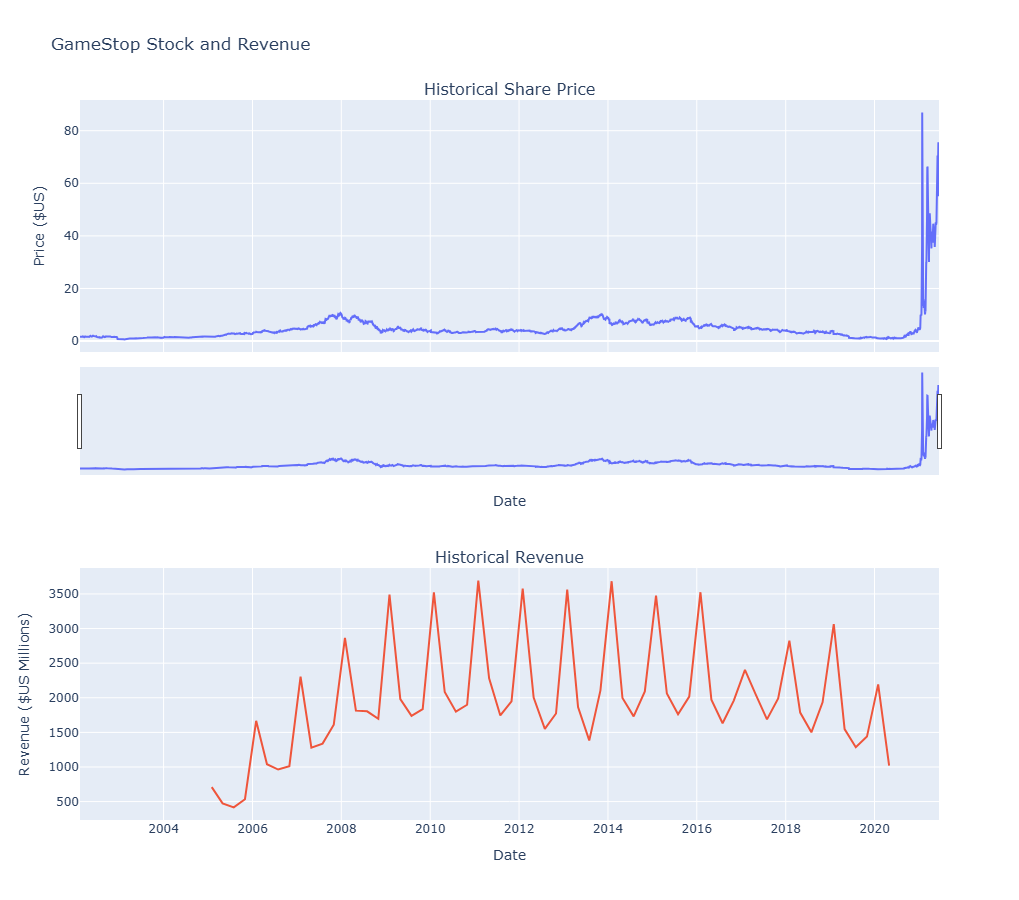

In [112]:
make_graph(gme_data, gme_revenue, "GameStop Stock and Revenue")